In [1]:
# Алексеев Д.П. (DSU-4,MDS-18)
# Домашнее задание к лекции «Продвинутая оптимизация» (#7).

# При фиксированном seed=21  поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: 
# strategy, popsize, tol, mutation, recombination и updating.
# Постройте графики количества итераций оптимизации функции Растригина от значения параметра.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [3]:
# определим функцию Растригина. 
def rastrigin(x):
    A = 10.0
    y = sum(A + x**2 - A*np.cos(2*np.pi*x))
    return y

In [4]:
bounds = [(-5,5),(-5,5),(-5,5)]

In [5]:
# 1. Рассмотрим зависимость от применяемых стратегий дифф.эволюции (параметр strategy)
list_strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
                 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 
                 'rand2bin', 'rand1bin']
nit_list = []

for i in list_strategy:
    result = differential_evolution(rastrigin, bounds, seed = 21, strategy = i)
    nit_list.append(result.nit)   

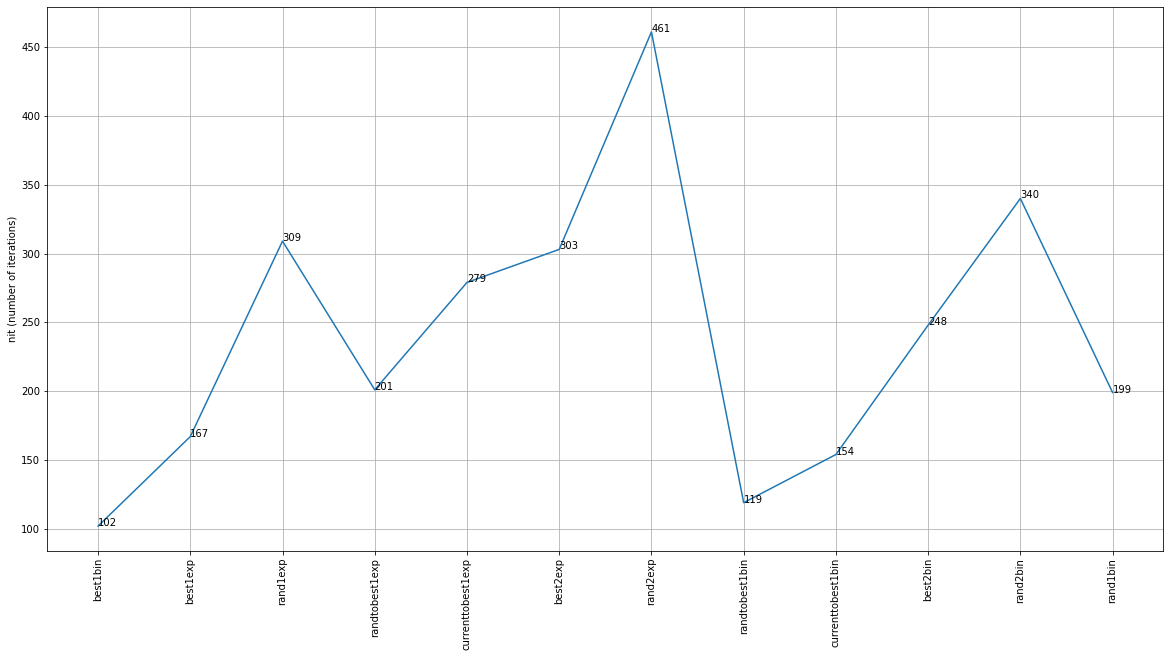

In [6]:
plt.figure(figsize=(20, 10))    
plt.plot(list_strategy, nit_list)
# добавим подписи со значениями nit_list к точкам
for a,b in zip(list_strategy, nit_list): 
    plt.text(a, b, str(b))

plt.xticks(list_strategy, rotation='vertical')
plt.ylabel('nit (number of iterations)')
plt.grid()
plt.show()


# Вывод по стратегиям: как видно из графика, наилучшие результаты по количеству итераций дает стратегия "по умолчанию"
# 'best1bin' - поиск минимума занял 102 итерации. Далее следует 'randtobest1bin' (119 итераций).
# Наиболее медленная стратегия в данном случае - rand2exp (461 итерация).

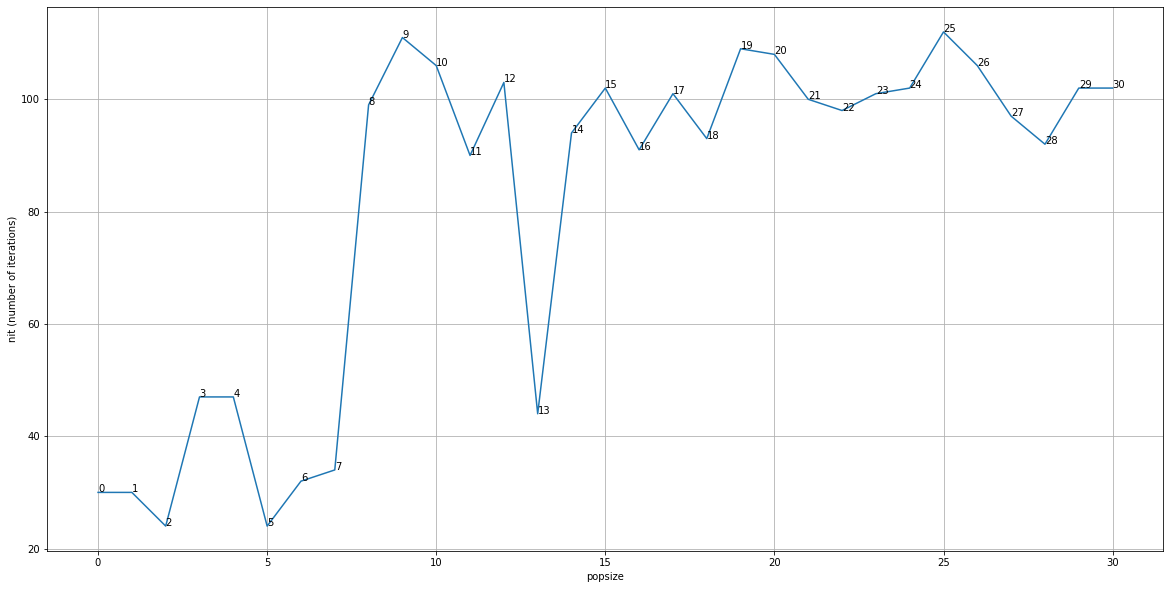

In [7]:
# 2. Рассмотрим зависимость от параметра popsize (размер популяции)
popsize_list = []
nit_list = []

# Пусть параметр popsize меняется от 0 до 30 с шагом 1
for i in range(0, 31, 1):
    result = differential_evolution(rastrigin, bounds, seed = 21, popsize = i)
    popsize_list.append(i)
    nit_list.append(result.nit)
    
plt.figure(figsize=(20, 10))    
plt.plot(popsize_list, nit_list)
# добавим подписи со значениями popsize к точкам
for a,b in zip(popsize_list, nit_list): 
    plt.text(a, b, str(a))

plt.xlabel('popsize')
plt.ylabel('nit (number of iterations)')
plt.grid()
plt.show()

# Из графика можно сделать вывод, что оптимальными являются значения popsize = 2 и 5 (количество итераций менее 30).
# При увеличении popsize от 8-и и выше происходит резкое увеличение кол-ва требуемых итераций до уровня ~100
# (со странным "провалом" на popsize=13 до уровня ~45).

0.0      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

0.05      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

0.1      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

0.15000000000000002      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

0.2      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

0.25      fun: 0.0
 message: 'Optimization terminated successfully.'
    

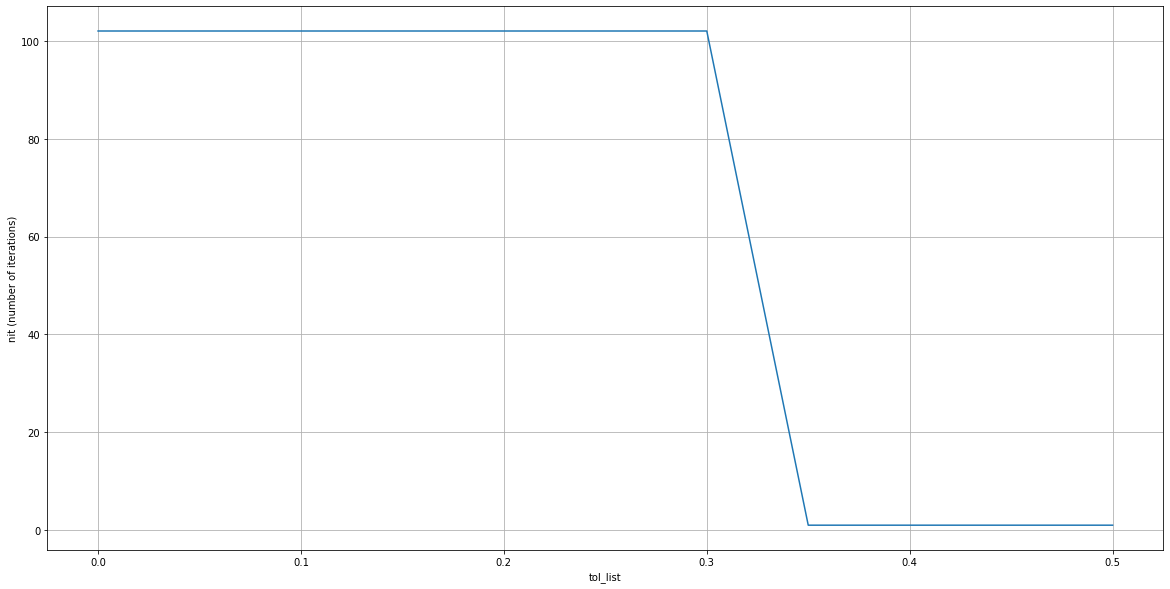

In [8]:
# 3. Рассмотрим зависимость от параметра tol
tol_list = []
nit_list = []

# Пусть параметр tol меняется от 0 до 0.5 с шагом 0.05
for i in np.arange(0, 0.51, 0.05):
    result = differential_evolution(rastrigin, bounds, seed = 21, tol = i)
    tol_list.append(i)
    nit_list.append(result.nit)
    print(i, result)
    print("")
    
plt.figure(figsize=(20, 10))    
plt.plot(tol_list, nit_list)

plt.xlabel('tol_list')
plt.ylabel('nit (number of iterations)')
plt.grid()
plt.show()

# Из графика и трассировки расчета можно сделать вывод, 
# что при значении tol = 0.35 и выше происходит резкое уменьшение количества требуемых итераций со 102-х до 1,
# что впрочем не означает нахождения минимума (оптимизация заканчивается "успешно" технически, но минимум в точке 0 не найден:
# fun: 10.94451935567361
# x: array([ 0.99495863, -2.98485571, -0.99495864]).

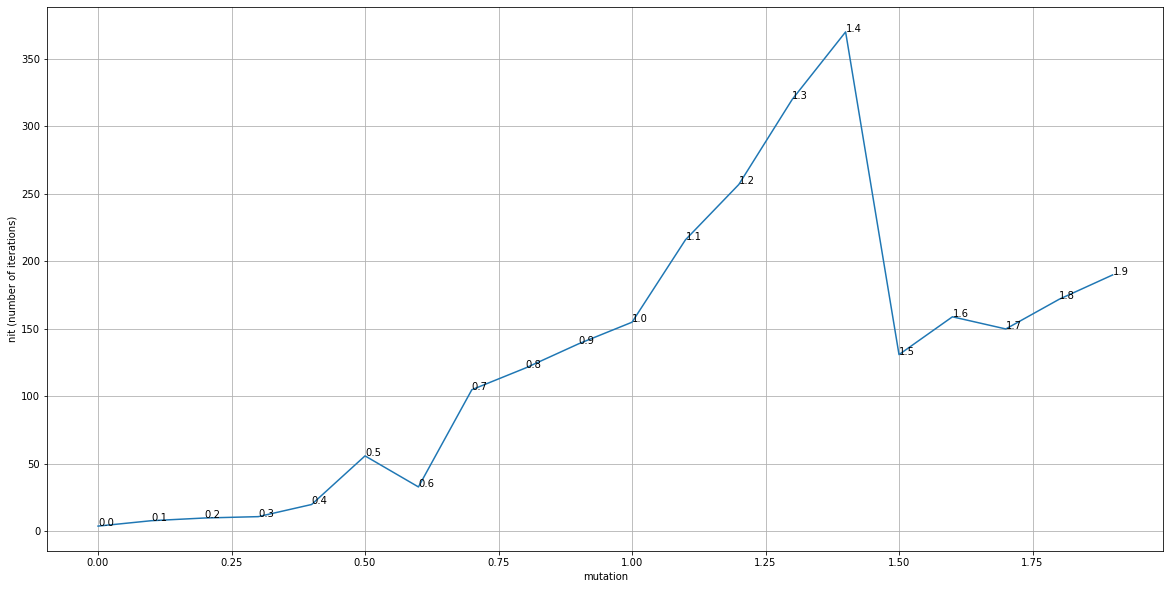

In [9]:
# 4. Рассмотрим зависимость от параметра mutation
mut_list = []
nit_list = []

# Пусть параметр mutation меняется в допустимых пределах от 0 до 2.0 с шагом 0.1
for i in np.arange(0, 2.0, 0.1):
    result = differential_evolution(rastrigin, bounds, seed = 21, mutation = i)
    mut_list.append(i)
    nit_list.append(result.nit)
    
plt.figure(figsize=(20, 10))    
plt.plot(mut_list, nit_list)
# добавим подписи со значениями mut_list к точкам
for a,b in zip(mut_list, nit_list): 
    plt.text(a, b, str(round(a,1)))

plt.xlabel('mutation')
plt.ylabel('nit (number of iterations)')
plt.grid()
plt.show()

# Из графика можно сделать вывод, что оптимальное значение параметра mutation находится в интервале [0; 0.6],
# далее следует резкий рост до 350+ итераций.
# При значениях мутации от 1.5 до 2.0 количество итераций возвращается на приемлемый уровень 140-200 итераций.

In [10]:
# 5. Рассмотрим зависимость от параметра recombination
rec_list = []
nit_list = []

# Пусть параметр recombination меняется в допустимых пределах от 0 до 1.0 с шагом 0.05
for i in np.arange(0, 1.0, 0.05):
    result = differential_evolution(rastrigin, bounds, seed = 21, recombination = i)
    rec_list.append(i)
    nit_list.append(result.nit)
    print(i, result)
    print("")

0.0      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5449
     nit: 120
 success: True
       x: array([ 9.80778792e-10, -2.34184894e-11, -3.82102128e-10])

0.05      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5629
     nit: 124
 success: True
       x: array([ 1.41700318e-09,  1.31760491e-09, -4.36989334e-11])

0.1      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5629
     nit: 124
 success: True
       x: array([ 1.25033206e-09, -4.59115523e-10, -1.28886568e-09])

0.15000000000000002      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5359
     nit: 118
 success: True
       x: array([-2.74404943e-10, -6.77929379e-10, -3.94892452e-10])

0.2      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5404
     nit: 119
 success: True
       x: array([-5.90103522e-10,  5.38683542e-10, -5.81835136e-10])

0.25      fun: 0.0
 message: 'Optimization terminated successfully.'
    

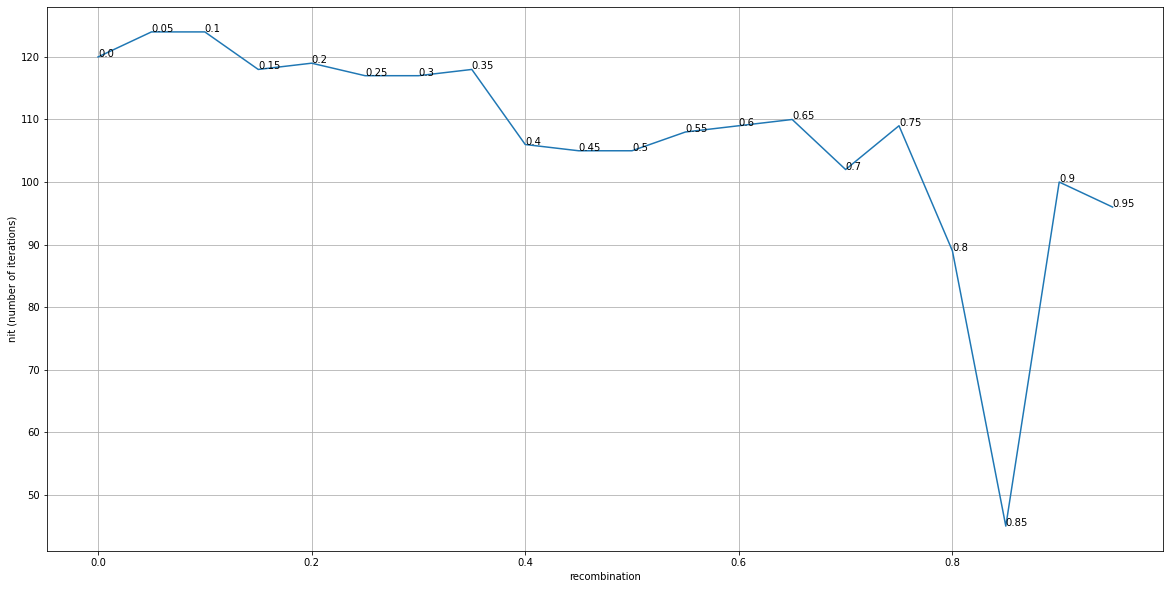

In [11]:
# выведем график отдельно от трассировки    
plt.figure(figsize=(20, 10))    
plt.plot(rec_list, nit_list)
# добавим подписи со значениями rec_list к точкам
for a,b in zip(rec_list, nit_list): 
    plt.text(a, b, str(round(a, 2)))

plt.xlabel('recombination')
plt.ylabel('nit (number of iterations)')
plt.grid()
plt.show()

# График получился с интересным провалом на recombination=0.85, но трассировка расчета показала, 
# что, несмотря на минимальное количество итераций(45), минимум функции в данном случае не был найден:
# fun: 0.9949590570933129
# x: array([-5.04018912e-09, -9.94958646e-01, -4.86137871e-09])
    
# В целом, разумное увеличение параметра recombination может привести к
# увеличению производительности оптимизации (порядка 20%).

In [12]:
# 5. Рассмотрим зависимость от параметра updating
updating_immediate = differential_evolution(rastrigin, bounds, seed = 21, updating = 'immediate')
print("updating_immediate:", updating_immediate)
print("")

updating_deferred = differential_evolution(rastrigin, bounds, seed = 21, updating = 'deferred')
print("updating_deferred:", updating_deferred)

# Вывод: при updating = 'immediate' оптимизация нашла минимум чуть быстрее (102 итерации против 124 при updating_deferred)

updating_immediate:      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4639
     nit: 102
 success: True
       x: array([ 1.49487978e-09,  1.42230672e-11, -8.29773472e-10])

updating_deferred:      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 5629
     nit: 124
 success: True
       x: array([-1.19784072e-09, -6.04708505e-10,  6.11243278e-10])
